In [177]:
"""
Data Sources:
    http://data.worldbank.org/indicator/SP.DYN.TFRT.IN?view=map&year=1960
    http://data.worldbank.org/indicator/SE.ADT.LITR.ZS?end=2010&start=1990&view=map&year=1990
    http://data.worldbank.org/indicator/NY.GDP.PCAP.CD?view=map
    http://data.worldbank.org/indicator/NY.GNP.PCAP.CD?view=map&year=2015
    http://data.worldbank.org/indicator/SP.DYN.LE00.IN?end=2014&start=2014&view=map&year=2014
    https://data.oecd.org/healthstat/suicide-rates.htm
    
"""
%matplotlib inline

from IPython.core.pylabtools import figsize
figsize(15,9)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import feature_extraction as skfe
from sklearn import ensemble as sken
from sklearn import linear_model as sklin

import copy

import os

In [178]:
data_dir = 'data/'

for f in sorted(os.listdir(data_dir)):
    print(f)

fert_file = data_dir + 'fertility_per_woman_by_country.csv'
gdp_file = data_dir + 'gdp_per_capita_by_country.csv'
gni_file = data_dir + 'gni_per_capita_by_country.csv'
life_file = data_dir + 'life_expectancy_by_country.csv'
lit_file = data_dir + 'literacy_by_country.csv'

suicide_file = data_dir + 'suicide_per_100k_by_country.csv'

.~lock.gdp_per_capita_by_country.csv#
.~lock.suicide_per_100k_by_country.csv#
fertility_per_woman_by_country.csv
gdp_per_capita_by_country.csv
gni_per_capita_by_country.csv
life_expectancy_by_country.csv
literacy_by_country.csv
suicide_per_100k_by_country.csv


In [179]:
frt_df = pd.read_csv(fert_file)
gdp_df = pd.read_csv(gdp_file)
gni_df = pd.read_csv(gni_file)
lex_df = pd.read_csv(life_file)
lit_df = pd.read_csv(lit_file)

scd_df = pd.read_csv(suicide_file)

In [180]:
def is_num(x):
    try:
        float(x)
        return True
    except:
        return False


def get_data(df, field, data_dict):
    for index, row in df.iterrows():
        country = row['Country Name']
        cc = row['Country Code']
        
        if cc not in data_dict:
            data_dict[cc] = {}
        
        for k in list(row.keys()):
            if is_num(k):
                str_k = str(k)
                if str_k not in data_dict[cc]:
                    data_dict[cc][str_k] = {}
                                    
                data_dict[cc][str_k][field] = row[k]

In [181]:
data_dict = {}
get_data(frt_df, 'fert', data_dict)
get_data(gdp_df, 'gdp',  data_dict)
get_data(gni_df, 'gni',  data_dict)
get_data(lex_df, 'lex',  data_dict)
get_data(lit_df, 'lit',  data_dict)

In [182]:
target_name = 'TOT'

for index, row in scd_df.iterrows():
    cc = row['LOCATION']
    yr = str(row['TIME'])
    scd = row['Value']
    subj = row['SUBJECT']
    
    if cc not in data_dict:
        data_dict[cc] = {}
    
    if yr not in data_dict[cc]:
        data_dict[cc][yr] = {}
    
    if subj == target_name:
        data_dict[cc][yr]['TARGET'] = scd


In [183]:
input_dicts = []

for cc in data_dict:
    for yr in data_dict[cc]:
        row = copy.deepcopy(data_dict[cc][yr])
#         row['ctry'] = cc
        row['yr'] = int(yr)
        input_dicts.append(row)

In [184]:
DV = skfe.DictVectorizer(sparse=False)
all_data = np.nan_to_num(DV.fit_transform(input_dicts))
tgt_idx = DV.vocabulary_['TARGET']

targets = all_data[:, tgt_idx]
print(all_data.shape)
inputs = np.delete(all_data, tgt_idx, 1)
print(inputs.shape)

(15048, 7)
(15048, 6)


In [185]:
print(DV.feature_names_)

['TARGET', 'fert', 'gdp', 'gni', 'lex', 'lit', 'yr']


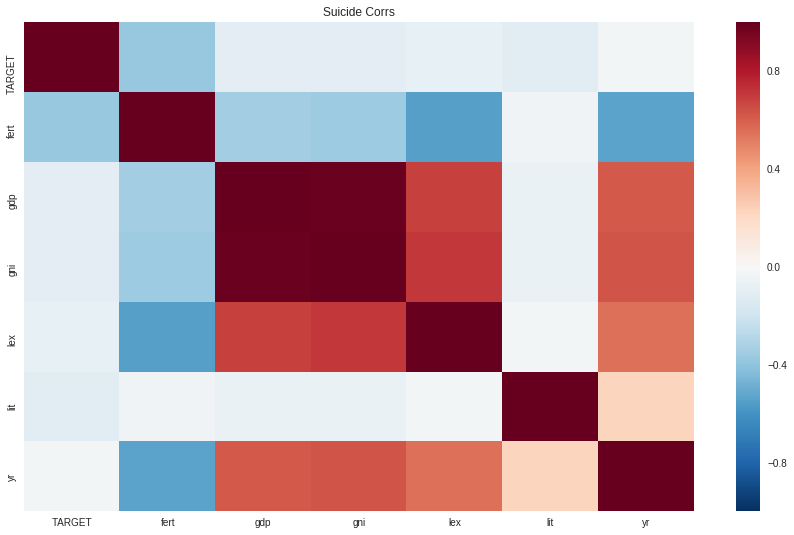

In [186]:
all_df = pd.DataFrame(all_data, columns=DV.feature_names_)
all_df = all_df[all_df['TARGET'] != 0.0]
corrs = all_df.corr()
sns.heatmap(corrs)
plt.title('Suicide Corrs')
plt.show()

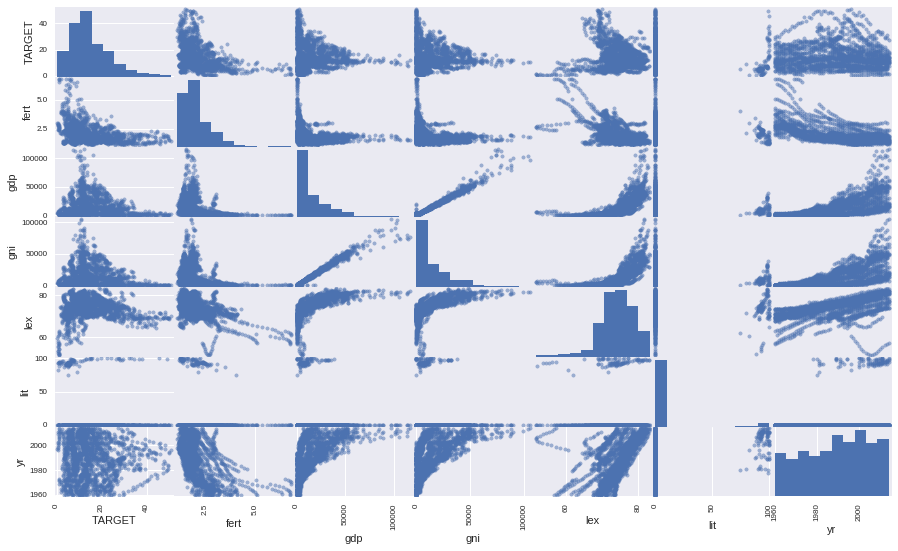

In [188]:
pd.tools.plotting.scatter_matrix(all_df)
plt.show()